In [1]:
# single genset with load
import matplotlib.pyplot as plt
import numpy as np

# define needed function
# find closest value in array
def find_nearest(x,value):
    idx = np.abs(x[np.isfinite(x)] - value).argmin()
    #print(f"idx for {value} is {idx}")
    return idx

In [2]:
# define space
N = 100
offset = N//2
pq_width = 140
p = np.linspace(-pq_width,pq_width,N)
q = np.linspace(-pq_width,pq_width,N)

# full-load targets
# by design
f_bus = 60       # Hz
v_bus = 120      # V
s_rated = 120      # VA
s_phi = .33 * s_rated
# from data
p_fl = 39.3
q_fl = 21

# no-load intercepts
# from collected data
f_nl = 61.7      # Hz
v_nl = 128       # V

In [3]:
# define slopes
Sp = p_fl / abs(f_nl - f_bus)
Sq = q_fl / abs(v_nl - v_bus)
Sp_inv = 1/Sp
Sq_inv = 1/Sq
print(f"Sp-1: {Sp_inv:.3f}")
print(f"Sp: {Sp:.2f}")
print(f"Sq-1: {Sq_inv:.3f}")
print(f"Sq: {Sq:.2f}")

Sp-1: 0.043
Sp: 23.12
Sq-1: 0.381
Sq: 2.62


In [4]:
# define load
pL = .8 * s_rated
pG = .5 * pL
pB = .5 * pL
qL = s_rated * np.sin(np.arccos(.8))
qG = .5 * qL
qB = .5 * qL
p_bus = -pB
q_bus = -qB
print(f"PL: {pL:.2f} W")
print(f"PG: {pG:.2f} W")
print(f"PB: {pB:.2f} W")
print(f"QL: {qL:.2f} VAr")
print(f"QG: {qG:.2f} VAr")
print(f"QB: {qB:.2f} VAr")
# find new v_nl
v_nl = (qG + Sq*v_bus) / Sq
# find new f_nl
f_nl = (pG + Sp*f_bus) / Sp

# define lines
# define the P and Q slopes
fP = -Sp_inv * p + f_nl
qV = -Sq_inv * q + v_nl

# get index of full load power point
idx_P = find_nearest(fP,f_bus)
idx_Q = find_nearest(qV,v_bus)

PL: 96.00 W
PG: 48.00 W
PB: 48.00 W
QL: 72.00 VAr
QG: 36.00 VAr
QB: 36.00 VAr


Text(140, 60, 'fbus')

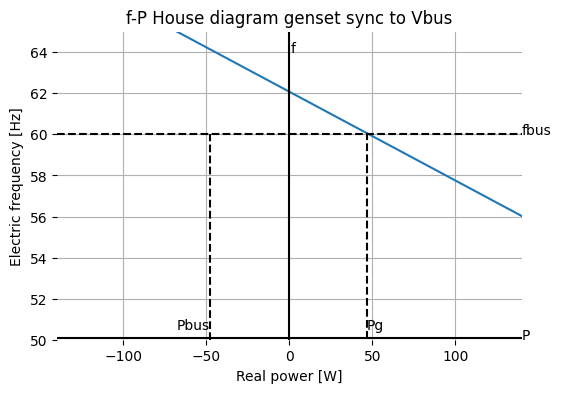

In [5]:
# plot f-P diagram
fmax = 65
fmin = 50
fig = plt.figure(figsize=(6,4))
# frame
plt.box(False)
plt.grid(visible=True)
plt.xlim(-pq_width,pq_width)
plt.ylim(fmin,fmax)
# plot lines
plt.plot(p,fP)
plt.vlines(0,fmin,fmax,colors='k')
plt.hlines(fmin+.08,-pq_width,pq_width,colors='k')
plt.hlines(f_bus,-pq_width,pq_width,colors='k',linestyles='dashed')
plt.vlines(p[idx_P],0,fP[idx_P],colors='k',linestyles='dashed',label='Pg')
plt.vlines(p_bus,fmin,f_bus,colors='k',linestyles='dashed',label='Pb')
# labels
plt.title('f-P House diagram genset sync to Vbus')
plt.xlabel('Real power [W]')
plt.ylabel('Electric frequency [Hz]')
plt.text(1,fmax-1,"f")
plt.text(pq_width,fmin,"P")
plt.text(p[idx_P],fmin+.5,"Pg")
plt.text(p_bus-20,fmin+.5,"Pbus")
plt.text(pq_width,f_bus,"fbus")
#plt.show()

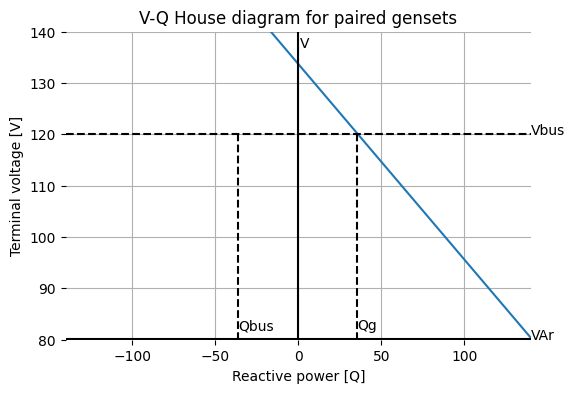

In [6]:
# plot V-Q diagram
vmax = 140
vmin = 80
fig = plt.figure(figsize=(6,4))
# frame
plt.box(False)
plt.grid(visible=True)
plt.xlim(-pq_width,pq_width)
plt.ylim(vmin,vmax)
# plot lines
plt.plot(q,qV)
plt.vlines(0,vmin,vmax,colors='k')
plt.hlines(vmin+0.1,-pq_width,pq_width,colors='k')
plt.hlines(v_bus,-pq_width,pq_width,colors='k',linestyles='dashed')
plt.vlines(q[idx_Q],vmin,qV[idx_Q],colors='k',linestyles='dashed',label='Qg')
plt.vlines(q_bus,vmin,v_bus,colors='k',linestyles='dashed',label='Qb')
# labels
plt.title('V-Q House diagram for paired gensets')
plt.xlabel('Reactive power [Q]')
plt.ylabel('Terminal voltage [V]')
plt.text(1,vmax-3,"V")
plt.text(pq_width,vmin+0,"VAr")
plt.text(q[idx_Q],vmin+2,"Qg")
plt.text(q_bus,vmin+2,"Qbus")
plt.text(pq_width,v_bus,"Vbus")
plt.show()